In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_finance import candlestick_ohlc

import matplotlib.dates as mdates
import datetime as dt
from datetime import date, timedelta
from datetime import timedelta, datetime


import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [15]:
df = pd.read_csv('./data/BTC-USD.csv',sep=',', date_parser=True)
df.drop('Adj Close', inplace = True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [16]:
End = '2016-09-10'

In [17]:
End = pd.to_datetime(End)
Start = (End - timedelta(days=365))
df1 = df.loc[Start:End]
df1.index = df1.index.map(mdates.date2num)

In [18]:
Min_pozycja = df1['Low'].argmin()
Max_pozycja = df1['High'].argmax()

In [19]:
if Min_pozycja < Max_pozycja and Max_pozycja < len(df1)-10:
    
    
    #Trend wzrostowy L1
    
    Max_idx = df1.iloc[Max_pozycja].name
    Ax = df1.iloc[Min_pozycja].name
    Ay = df1['Low'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df1.iloc[Min_pozycja].name
    By = df1['Low'].loc[Bx]
    B = [Bx, By]
    
    a1 = (Ay-By)/(Ax-Bx)
    b1 = By - a1 * Bx
    
    df11=df1[A[0]:Max_idx]
    df11['Pozycja na LT'] = df11.index * a1 + b1
    df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
    good = df11['check'][df11['check']>=0].count()
    sum = len(df11['check'])
    
    for i in range(len(df11)):
        df11=df1[B[0]:Max_idx]
        Bx = df11.iloc[0].name
        By = df11['Low'].loc[Bx]
        B = [Bx, By]

        a1 = (Ay-By)/(Ax-Bx)
        b1 = By - a1 * Bx

        df11['Pozycja na LT'] = df11.index * a1 + b1
        df11['check']= round(df11['Low'] - df11['Pozycja na LT'],0)
        good = df11['check'][df11['check']>=0].count()
        sum = len(df11['check'])

        if good == sum:
            
            print('Pierwszy trend:  Wzrostowy')
            print('Max/Min:  Wcześniej niż 20 dni od końca')
            print('------------------------------------------------------------------------------')
            print('TREND L1')
            print('Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy')
            print(f'Punkt A:{A}, Punkt C: {C}')
            print('------------------------------------------------------------------------------')
            break
        else:
            df11=df1[B[0]+1:Max_idx]
            Bx = df11.iloc[0].name
            By = df11['Low'].loc[Bx]
            B = [Bx, By]

            a1 = (Ay-By)/(Ax-Bx)
            b1 = By - a1 * Bx
                
            Cx = df1.index.max()+60
            Cy = a1 * Cx + b1
            C = [Cx, Cy]

            X_long = [Ax, Cx]
            Y_long = [Ay, Cy]
    
    
    #--------------------------------------------------------------------
    # Trend spadkowy M1
    df2 = df1.iloc[Max_pozycja:]
    Min_pozycja2 = df2['Low'].argmin()
    Max_idx2 = df2.iloc[Min_pozycja2].name
    
    
    Ax = df2.iloc[0].name
    Ay = df2['High'].loc[Ax]
    A = [Ax, Ay]
    
    Bx = df2.iloc[0].name
    By = df2['High'].loc[Bx]
    B = [Bx, By]
    
    a2 = (Ay-By)/(Ax-Bx)
    b2 = By - a2 * Bx
    
    df21 = df2[A[0]:Max_idx2]
    df21['Pozycja na LT'] = df21.index * a2 + b2
    df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
    good = df21['check'][df21['check']<=0].count()
    sum = len(df21['check'])
    
    for i in range(len(df21)):
        
        df21=df2[B[0]:Max_idx2]
        Bx = df21.iloc[0].name
        By = df21['High'].loc[Bx]
        B = [Bx, By]

        a2 = (Ay-By)/(Ax-Bx)
        b2 = By - a2 * Bx

        df21['Pozycja na LT'] = df21.index * a2 + b2
        df21['check']= round(df21['High'] - df21['Pozycja na LT'],0)
        good = df21['check'][df21['check']<=0].count()
        sum = len(df21['check'])

        if good == sum:
            print('TREND M1')
            print('Znaleziona 2 punkty przez które można przeprowadzić linie trendu')
            print(f'Punkt A:{A}, Punkt C: {C}')
            break
            
        else:
            df21=df2[B[0]+1:Max_idx2]
            Bx = df21.iloc[0].name
            By = df21['High'].loc[Bx]
            B = [Bx, By]

            a2 = (Ay-By)/(Ax-Bx)
            b2 = By - a2 * Bx
                
            Cx = df2.index.max() +10
            Cy = a2 * Cx + b2
            C = [Cx, Cy]
            
            if Cy < df1.High.mean()*0.3:
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy>df1.High.mean()*0.3:
                        break
            elif Cy > df1.High.max()*(3/2):
                for i  in range(0,len(df1)):
                    Cx = (df1.index.max()) - i
                    Cy = a2*Cx +b2
                    if Cy < df1.High.max()*(3/2):
                        break

            X_mid1 = [Ax, Cx]
            Y_mid1 = [Ay, Cy]

Pierwszy trend:  Wzrostowy
Max/Min:  Wcześniej niż 20 dni od końca
------------------------------------------------------------------------------
TREND L1
Znaleziona 2 punkty przez które można przeprowadzić trend L1 wzrostowy
Punkt A:[16700.0, 225.117004], Punkt C: [17114.0, 587.7165184098358]
------------------------------------------------------------------------------
TREND M1
Znaleziona 2 punkty przez które można przeprowadzić linie trendu
Punkt A:[16970.0, 777.98999], Punkt C: [17064.0, 509.94010923808673]


In [20]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-09-15'

In [21]:
End = pd.to_datetime(End)
dfx = df.loc[Start:End]
dfx.index = dfx.index.map(mdates.date2num)

# Pierwsze przerwanie trendu L1

In [22]:
dfL1 = dfx[Max_idx:]
dfL1['TrendLine'] = dfL1.index * a1 + b1
dfL1['Distance(Low-TL)'] = dfL1['Close'] - dfL1['TrendLine']
QPointsAfterBrake = dfL1['Distance(Low-TL)'][dfL1['Distance(Low-TL)']<0].count()


if QPointsAfterBrake > 0:
    
    ClosingPrice_BP =  dfL1['Close'][dfL1['Distance(Low-TL)']<0].iloc[0]
    ClosingPrice_BPPosition = dfL1.index[dfL1['Distance(Low-TL)']<0][0]
    PointBeforeBPPosition = ClosingPrice_BPPosition - 1
    PointBeforeBPPrice = dfL1['Close'].loc[PointBeforeBPPosition]
    TrendPriceBeforeBP  =  PointBeforeBPPosition * a1 + b1
    
    #Sprawdzamy, czy przełamanie trendu znajduje się w ostatnich 80 dniach od końcowej daty analizowaneog okresu
    
    EndingPoint = dfL1.index[-1]
    
    if EndingPoint - 80 > ClosingPrice_BPPosition:
        print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
        print('-----------------------------------------------------------------------------------------')
        print('Nie rysujemy tuneli')
    
    else:
        print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
    
        #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
        #Jeśli tunel jest mniejszy: cena otwarcia staje się górną granicą tunelu

        BPPrice = ClosingPrice_BPPosition *a1 + b1
        OpenPrice_BP = dfL1.loc[ClosingPrice_BPPosition]['Open']
        BPCandleHeight = OpenPrice_BP - ClosingPrice_BP
        TunelHeight = BPPrice - ClosingPrice_BP


        if TunelHeight/BPCandleHeight < 1/4:

            print('Draw a tunel starting from Open to Close')

            if TrendPriceBeforeBP < PointBeforeBPPrice:

                ClosingPrice_BPPositionEnd = dfL1.index[-1]+5
                BPPrice = OpenPrice_BP


                XBP = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YBP = [BPPrice, BPPrice]
                XClosingPrice = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YClosingPrice = [ClosingPrice_BP, ClosingPrice_BP]


                print('Przebicie trendu wzrostowego L1 w dół')
                print(f'Punkt przecięcia: {YBP[0]}')
                print(f'Punkt wsparcia: {YClosingPrice[0]}')
                print('---------------------------------------')

                # liczymy przełamania cen w korytarzu

                dfL1a = dfx[ClosingPrice_BPPosition:]
                dfL1a['DownLine'] = ClosingPrice_BP
                dfL1a['UpLine'] = BPPrice
                dfL1a['Down-Close'] = dfL1a['Close'] - dfL1a['DownLine']
                dfL1a['UP-Close'] = dfL1a['UpLine'] - dfL1a['Close']

                DownBreaks = len(dfL1a['Close'][dfL1a['Down-Close'] < 0])
                UpBreaks = len(dfL1a['Close'][dfL1a['UP-Close'] < 0])

        #-----------------------------------------------------------------------------------------------------------------

                if DownBreaks > 0 and UpBreaks == 0:


                    BPPrice = OpenPrice_BP
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2Price = dfL1a['Close'][dfL1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfL1a.index[dfL1a['Down-Close']<0][0]
                    BP2 = [BP2Possition, BP2Price]
                    BP3 = BP2
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Possition}')

                    # przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = ClosingPrice_BP - BP2Price

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Short position recomended')

                        dfL1b = dfx[BP2[0]:]
                        dfL1b['TrendLine'] = dfL1b.index * a1 + b1
                        dfL1b['UpBreakOfTL'] = dfL1b['Close'] - dfL1b['TrendLine']

                    else:
                        print('')

        #-----------------------------------------------------------------------------------------------------------------               

                elif UpBreaks >0 and DownBreaks ==0:

                    BPPrice = OpenPrice_BP
                    BP3Price = dfL1a['Close'][dfL1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfL1a.index[dfL1a['UP-Close'] < 0][0]

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    print('Third BP founded')

                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

                    # if  przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = BP3Price - BPPrice

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Long position recomended')

                    else:
                        print('')

        #----------------------------------------------------------------------------------------------------------                

                elif DownBreaks > 0 and UpBreaks > 0:

                    BPPrice = OpenPrice_BP
                    BP2Price = dfL1a['Close'][dfL1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfL1a.index[dfL1a['Down-Close']<0][0]

                    BP3Price = dfL1a['Close'][dfL1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfL1a.index[dfL1a['UP-Close'] < 0][0]

                    if BP2Possition < BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')

                    #----------------------------------------------------------------------------------------------------        

                    elif BP2Possition > BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
            #------------------------------------------------------------------------------------------
                else:
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    print('There is no decisive BP yet')

    #-----------------------------------------------------------------------------------------------------------------

        else:
            print('Draw a tunel starting from BP to Close')

            if TrendPriceBeforeBP < PointBeforeBPPrice:

                ClosingPrice_BPPositionEnd = dfL1.index[-1]+5
                BPPrice = ClosingPrice_BPPosition *a1 + b1


                XBP = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YBP = [BPPrice, BPPrice]
                XClosingPrice = [ClosingPrice_BPPosition, ClosingPrice_BPPositionEnd]
                YClosingPrice = [ClosingPrice_BP, ClosingPrice_BP]
                BPPrice = ClosingPrice_BPPosition *a1 + b1

                print('Przebicie trendu wzrostowego L1 w dół')
                print(f'Punkt przecięcia: {YBP[0]}')
                print(f'Punkt wsparcia: {YClosingPrice[0]}')
                print('---------------------------------------')

                # liczymy przełamania cen w korytarzu

                dfL1a = dfx[ClosingPrice_BPPosition:]
                dfL1a['DownLine'] = ClosingPrice_BP
                dfL1a['UpLine'] = BPPrice
                dfL1a['Down-Close'] = dfL1a['Close'] - dfL1a['DownLine']
                dfL1a['UP-Close'] = dfL1a['UpLine'] - dfL1a['Close']

                DownBreaks = len(dfL1a['Close'][dfL1a['Down-Close'] < 0])
                UpBreaks = len(dfL1a['Close'][dfL1a['UP-Close'] < 0])

        #-----------------------------------------------------------------------------------------------------------------

                if DownBreaks > 0 and UpBreaks == 0:

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2Price = dfL1a['Close'][dfL1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfL1a.index[dfL1a['Down-Close']<0][0]
                    BP2 = [BP2Possition, BP2Price]
                    BP3 = BP2
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Possition}')

                    # przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = ClosingPrice_BP - BP2Price

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Short position recomended')

                        dfL1b = dfx[BP2[0]:]
                        dfL1b['TrendLine'] = dfL1b.index * a1 + b1
                        dfL1b['UpBreakOfTL'] = dfL1b['Close'] - dfL1b['TrendLine']

                    else:
                        print('')

        #-----------------------------------------------------------------------------------------------------------------               

                elif UpBreaks >0 and DownBreaks ==0:

                    BP3Price = dfL1a['Close'][dfL1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfL1a.index[dfL1a['UP-Close'] < 0][0]

                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    print('Third BP founded')

                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')

                    # if  przebicie przekraczające 50% wielkości tunelu:

                    HeightOfTunel = BPPrice - ClosingPrice_BP
                    HeightOfBreak = BP3Price - BPPrice

                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 break Tunel by more than 50% height of tunel')
                        print('Long position recomended')

                    else:
                        print('')

        #----------------------------------------------------------------------------------------------------------                

                elif DownBreaks > 0 and UpBreaks > 0:

                    BP2Price = dfL1a['Close'][dfL1a['Down-Close'] < 0].iloc[0]
                    BP2Possition = dfL1a.index[dfL1a['Down-Close']<0][0]

                    BP3Price = dfL1a['Close'][dfL1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfL1a.index[dfL1a['UP-Close'] < 0][0]

                    if BP2Possition < BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')

                    #----------------------------------------------------------------------------------------------------        

                    elif BP2Possition > BP3Position:

                        BP1 = [ClosingPrice_BPPosition, BPPrice]
                        BP2 = [BP2Possition, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
    #----------------------------------------------------------------------------------------------------------
                        
                else:
                    BP1 = [ClosingPrice_BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    print('There is no decisive BP yet')

else:
    print('Brak przecięcia Lini trendu')

Brak przecięcia Lini trendu


Wykres bez tuneli


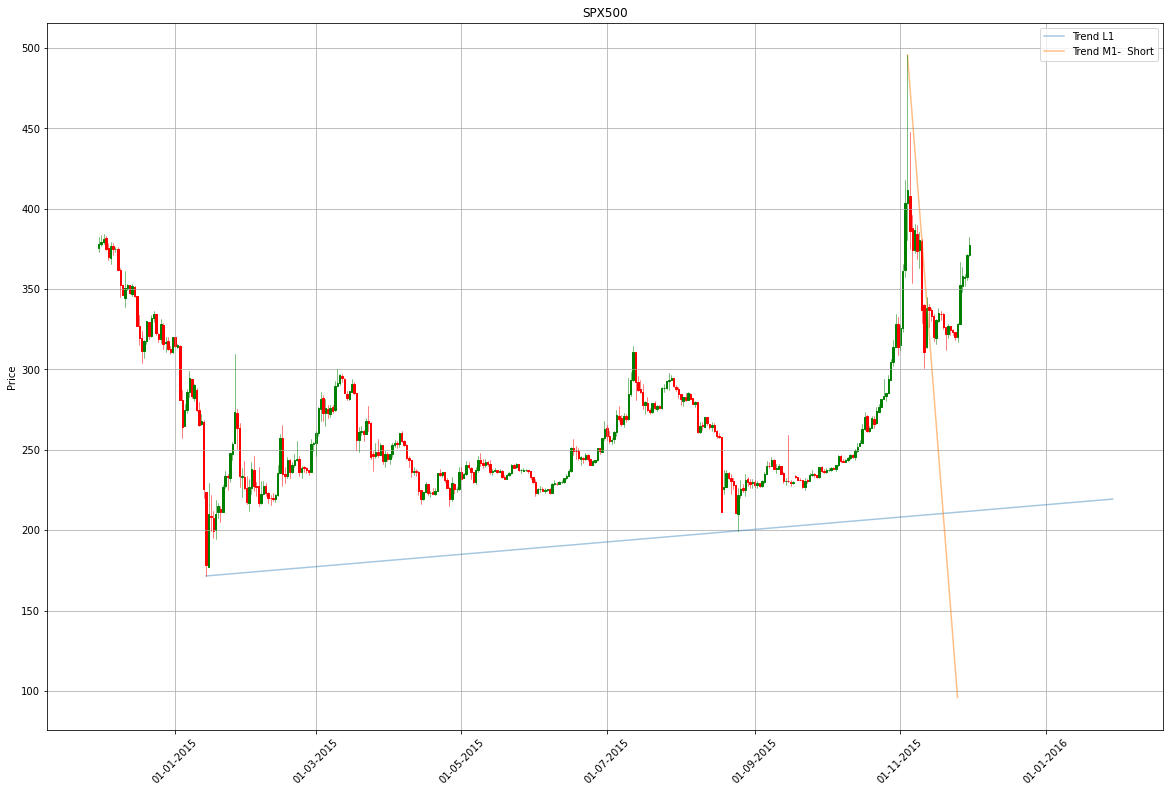

In [10]:
if QPointsAfterBrake < 1 or EndingPoint - 80 > ClosingPrice_BPPosition:
    
    df1.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    
    print('Wykres bez tuneli')
    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)

    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, df1.values, width=0.6, colorup='g', colordown='r')
    plt.show()

elif QPointsAfterBrake == 1:
    
    dfx.reset_index(inplace = True)
    dfL1.reset_index(inplace = True)
    dfL1a.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XBP, YBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfx.values, width=0.6, colorup='g', colordown='r')
    plt.show()
       
else:
    
    dfx.reset_index(inplace = True)
    dfL1.reset_index(inplace = True)
    dfL1a.reset_index(inplace = True)

    fig = plt.figure(figsize=(20,13))
    ax1 = fig.add_subplot(111)
    ax2 = fig.add_subplot(111)
    ax3 = fig.add_subplot(111)
    ax4 = fig.add_subplot(111)


    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

    ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
    ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

    ax3.plot(XBP, YBP, color='black', alpha = 0.4)
    ax3.plot(XClosingPrice, YClosingPrice, color='black', alpha = 0.5)

    ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
    ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )


    plt.ylabel("Price")
    plt.title('SPX500')
    ax1.grid(True)
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    candlestick_ohlc(ax1, dfx.values, width=0.6, colorup='g', colordown='r')
    plt.show()

# Przerwanie dla trendu M1

In [23]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-09-15'

In [24]:
End = pd.to_datetime(End)
dfxx = df.loc[Start:End]
dfxx.index = dfxx.index.map(mdates.date2num)

WARUNEK: trend zostaje przebity jeśli cena otwarcia jest poniżej trendu, a cena zamknięcia powyżej trendu, dlatego:
- Jeżeli Znajdziemy świeczke Close-TL < 0 oraz Open-TL < 0, to cofamy się o 1-2 świeczki i bierzemy 1 która spełni warunki:


     - High-TL < 0 i Open-TL > 0, górny tunel wyznaczony jest jako cena TL w znalezionej pozycji, a dolny to cena otwarcia świeczki 

In [25]:
dfM1 = dfxx[Max_idx:]
dfM1['TrendLine'] = dfM1.index * a2 + b2

dfM1['Distance(Close-TL)'] = dfM1['TrendLine'] - dfM1['Close']
dfM1['Distance(Open-TL)'] = dfM1['TrendLine'] - dfM1['Open']
dfM1['Distance(High-TL)'] = round(dfM1['TrendLine'],1) - round(dfM1['High'],1)

QPointsAfterBrake = len(dfM1['Distance(Close-TL)'][dfM1['Distance(Close-TL)']<0])

if QPointsAfterBrake > 0:
    
    print('Szukamy tunelu')
    
    #Sprawdzamy czy trend został przerwany całą świecą (Open-Close)
    BPPositionToCheck = dfM1.index[dfM1['Distance(Close-TL)']<0][0]
    BPOpenTL = dfM1['Distance(Open-TL)'].loc[BPPositionToCheck]
    
    #Jeśli cała świeca przerwała TL(M1)
    if BPOpenTL > 0:

#----------------------------------------------------1------------------------------------------------------------------- 
#------------------------------------------------------------------------------------------------------------------------

        #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
        BPPosition = BPPositionToCheck
        BPPrice = BPPosition * a2 + b2
        OpenBPPrice = dfM1['Open'].loc[BPPosition]
        CloseBPPrice = dfM1['Close'].loc[BPPosition]
        BPCandleHeight = OpenBPPrice - CloseBPPrice
        TunelHeight = BPPrice - CloseBPPrice
        
        #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
        EndingPoint = dfM1.index[-1]

        if EndingPoint - 80 > BPPosition:
            print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
            print('-----------------------------------------------------------------------------------------')
            print('Nie rysujemy tuneli')

        else:
            print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
            print('---------------------------------------------------------------------------------')
        
        
#------------------------------------------------1a---------------------------------------------------------------

            #Jeżeli tunel jest mniejszy niż 25% wielkości świeczki downline = Open BP, upline = Close BP
            if TunelHeight/BPCandleHeight < 1/4:
                
                #Współrzędne tuneli
                BPPositionEnd = dfM1.index[-1] + 5
                
                UpLineX = [BPPosition, BPPositionEnd]
                UplineY = [CloseBPPrice, CloseBPPrice]
                DownLineX = [BPPosition, BPPositionEnd]
                DownLineY = [OpenBPPrice, OpenBPPrice]
                
                print('Przebicie trendu spadkowego M1 w górę')
                print(f'Poziom wsparcia: {OpenBPPrice}')
                print(f'Poziom oporu: {CloseBPPrice}')
                print('---------------------------------------')
                
                #Szukamy przecięć tuelu
                dfM1a = dfxx[BPPosition:]
                dfM1a['DownLine'] = OpenBPPrice
                dfM1a['UpLine'] = CloseBPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
                
                #Liczymy przecięcia tuneli tuneli
                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
            
                #Jeżeli tylko przebicie w dół
                if DownBreaks > 0 and UpBreaks == 0:
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP1 = [BPPosition, OpenBPPrice]
                    BP2 = [BP2Position, BP2Price]
                    BP3 = BP2
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')
                    
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - OpenBPPrice
                    HeightOfBreak = OpenBPPrice - BP2Price
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Short position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                    
                    
                    
                    else:
                        print('No decisice BP yet')
                        
                #----------------------------------------------------------------
                
                #Jeśeli tylko przebicie w górę
                elif UpBreaks >0 and DownBreaks ==0:
                    
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    BP1 = [BPPosition, OpenBPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - OpenBPPrice
                    HeightOfBreak = BP3Price - CloseBPPrice
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('------------------------------------------------')
                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Long position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                        
                    else:
                        print('No decisice BP yet')
                        
                #------------------------------------------------------------------
                #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz
                
                elif DownBreaks > 0 and UpBreaks > 0:
                    
                    BP1 = [BPPosition, OpenBPPrice]
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    
                    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                    if BP2Position < BP3Position:

                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')
                    
                    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                    elif BP2Position > BP3Position:

                        
                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
            #----------------------------------------------------------------------
                #Jeżeli nie było żadnego przebicia
                else:
                    
                    BP1 = [BPPosition, OpenBPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    
                    print('No break point founded. You should wait')
                

        
#----------------------------------------------1b-----------------------------------------------------------------

            #Jeżeli tunel jest większy niż 25% wielkości świeczki downline = BP, upline = Close BP
            else:
                
                #Współrzędne tuneli
                BPPositionEnd = dfM1.index[-1] + 5
                
                UpLineX = [BPPosition, BPPositionEnd]
                UplineY = [CloseBPPrice, CloseBPPrice]
                DownLineX = [BPPosition, BPPositionEnd]
                DownLineY = [BPPrice, BPPrice]
                
                print('Przebicie trendu spadkowego M1 w górę')
                print(f'Poziom wsparcia: {BPPrice}')
                print(f'Poziom oporu: {CloseBPPrice}')
                print('---------------------------------------')
                
                #Szukamy przecięć tuelu
                dfM1a = dfxx[BPPosition:]
                dfM1a['DownLine'] = BPPrice
                dfM1a['UpLine'] = CloseBPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
                
                #Liczymy przecięcia tuneli tuneli
                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
            
                #Jeżeli tylko przebicie w dół
                if DownBreaks > 0 and UpBreaks == 0:
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP2 = [BP2Position, BP2Price]
                    BP3 = BP2
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')
                    
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - BPPrice
                    HeightOfBreak = BPPrice - BP2Price
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Short position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                    
                    
                    
                    else:
                        print('No decisice BP yet')
                        
                #----------------------------------------------------------------
                
                #Jeśeli tylko przebicie w górę
                elif UpBreaks >0 and DownBreaks ==0:
                    
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = CloseBPPrice - BPPrice
                    HeightOfBreak = BP3Price - CloseBPPrice
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('------------------------------------------------')
                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Long position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                        
                    else:
                        print('No decisice BP yet')
                        
                #------------------------------------------------------------------
                #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz
                
                elif DownBreaks > 0 and UpBreaks > 0:
                    
                    BP1 = [BPPosition, BPPrice]
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    
                    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                    if BP2Position < BP3Position:

                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')
                    
                    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                    elif BP2Position > BP3Position:

                        
                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
                #----------------------------------------------------------------------
                #Jeżeli nie było żadnego przebicia
                else:
                    
                    BP1 = [BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    
                    print('No break point founded. You should wait')
        

#------------------------------------------------2---------------------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------  

    #Jeśli cała świeca znalazła się nad TL(M1), a przerwanie nastąpiło przez przerwanie High-Close    
    else:
        
        BPPositionToCheck = BPPositionToCheck-1
        BPOpenTL = dfM1['Distance(Open-TL)'].loc[BPPositionToCheck]
        BPHighTL = dfM1['Distance(High-TL)'].loc[BPPositionToCheck]
        
        if BPOpenTL > 0 and BPHighTL > 0:
            
            print('Highest price don\'t cut the TL')
            print('Przesówamy się kolejy dzień w tył lub szukamy kolejnych przełamań w przyszłości')

        else:
            print('BPPosision founded is correct.')
            BPPosition = BPPositionToCheck
            BPPrice = BPPosition * a2 + b2

            #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
            EndingPoint = dfM1.index[-1]
    
            if EndingPoint - 80 > BPPosition:
                print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
                print('-----------------------------------------------------------------------------------------')
                print('Nie rysujemy tuneli')

            else:
                print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
                print('---------------------------------------------------------------------------------')

                #W tym przypadku tunel jest ograniczony Ceną przecięcia TL i ceną otwarcia świeczki
                
                OpenBPPrice = dfM1['Open'].loc[BPPosition]
                BPPositionEnd = dfM1.index[-1] + 5
                
                #Współrzędne tunelu:
                UpLineX = [BPPosition, BPPositionEnd]
                UplineY = [BPPrice, BPPrice]
                DownLineX = [BPPosition, BPPositionEnd]
                DownLineY = [OpenBPPrice, OpenBPPrice]
                
                print('Przebicie trendu spadkowego M1 w górę')
                print(f'Poziom oporu: {BPPrice}')
                print(f'Poziom wsparcia: {OpenBPPrice}')
                print('---------------------------------------')
                
                #Szukamy przecięć tuelu
                dfM1a = dfxx[BPPosition:]
                dfM1a['DownLine'] = OpenBPPrice
                dfM1a['UpLine'] = BPPrice
                dfM1a['Down-Close'] = dfM1a['Close'] - dfM1a['DownLine']
                dfM1a['UP-Close'] = dfM1a['UpLine'] - dfM1a['Close']
 
                DownBreaks = len(dfM1a['Close'][dfM1a['Down-Close'] < 0])
                UpBreaks = len(dfM1a['Close'][dfM1a['UP-Close'] < 0])
        
                #Jeżeli tylko przebicie w dół
                if DownBreaks > 0 and UpBreaks == 0:
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP2 = [BP2Position, BP2Price]
                    BP3 = BP2
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP2Price}, BP2Position: {BP2Position}')
                    
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = BPPrice - OpenBPPrice
                    HeightOfBreak = OpenBPPrice - BP2Price
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Short position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] < BP2Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is lower than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                    
                    
                    
                    else:
                        print('No decisice BP yet')
                        
                #----------------------------------------------------------------
                
                #Jeśeli tylko przebicie w górę
                elif UpBreaks >0 and DownBreaks ==0:
                    
                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    BP1 = [BPPosition, BPPrice]
                    BP3 = [BP3Position, BP3Price]
                    BP2 = BP3
                    
                    print('Second BP founded')
                    print(f'BP2Price: {BP3Price}, BP2Position: {BP3Position}')
                    
                    #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                    HeightOfTunel = BPPrice - OpenBPPrice
                    HeightOfBreak = BP3Price - BPPrice
                    
                    if HeightOfBreak >= 0.5 * HeightOfTunel:

                        print('------------------------------------------------')
                        print('BP2 breaks Tunel by more than 50% height of tunel')
                        print('Long position recomended')
                        
                    #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:
                    
                    elif dfM1['Close'].loc[BP3Position + 1] > BP3Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:
                        
                        print('---------------------------------------------------------------------')
                        print('Close price after BP is higher than BP close price and BP2 breaks Tunel by more than 30% height of tunel')
                        
                        print('Long position recomended')
                        
                    else:
                        print('No decisice BP yet')
                        
                #------------------------------------------------------------------
                #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz
                
                elif DownBreaks > 0 and UpBreaks > 0:
                    
                    BP1 = [BPPosition, BPPrice]
                    
                    BP2Price = dfM1a['Close'][dfM1a['Down-Close'] < 0].iloc[0]
                    BP2Position = dfM1a.index[dfM1a['Down-Close']<0][0]

                    BP3Price = dfM1a['Close'][dfM1a['UP-Close'] < 0].iloc[0]
                    BP3Position = dfM1a.index[dfM1a['UP-Close'] < 0][0]
                    
                    #Jeśli BP2 (przebicie w dół) wystąpiło przed BP3 (przebicie w górę)
                    if BP2Position < BP3Position:

                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Long Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP2}')
                        print(f'Third and decisive Break Point: {BP3}')
                    
                    #Jeśli BP3 (przebicie w górę) wystąpiło przed BP2 (przebicie w dół)
                    elif BP2Position > BP3Position:

                        
                        BP2 = [BP2Position, ClosingPrice_BP]
                        BP3 = [BP3Position, BPPrice]

                        print('Short Position recomended')
                        print(f'First Break Point: {BP1}')
                        print(f'Second Break Point: {BP3}')
                        print(f'Third and decisive Break Point: {BP2}')
                        
                #----------------------------------------------------------------------
                #Jeżeli nie było żadnego przebicia
                else:
                    
                    BP1 = [BPPosition, BPPrice]
                    BP2 = BP1
                    BP3 = BP1
                    
                    print('No break point founded. You should wait')
                    
    
else:
    print('Trend M1 nie został przeciety przez cene')

Szukamy tunelu
Highest price don't cut the TL
Przesówamy się kolejy dzień w tył lub szukamy kolejnych przełamań w przyszłości


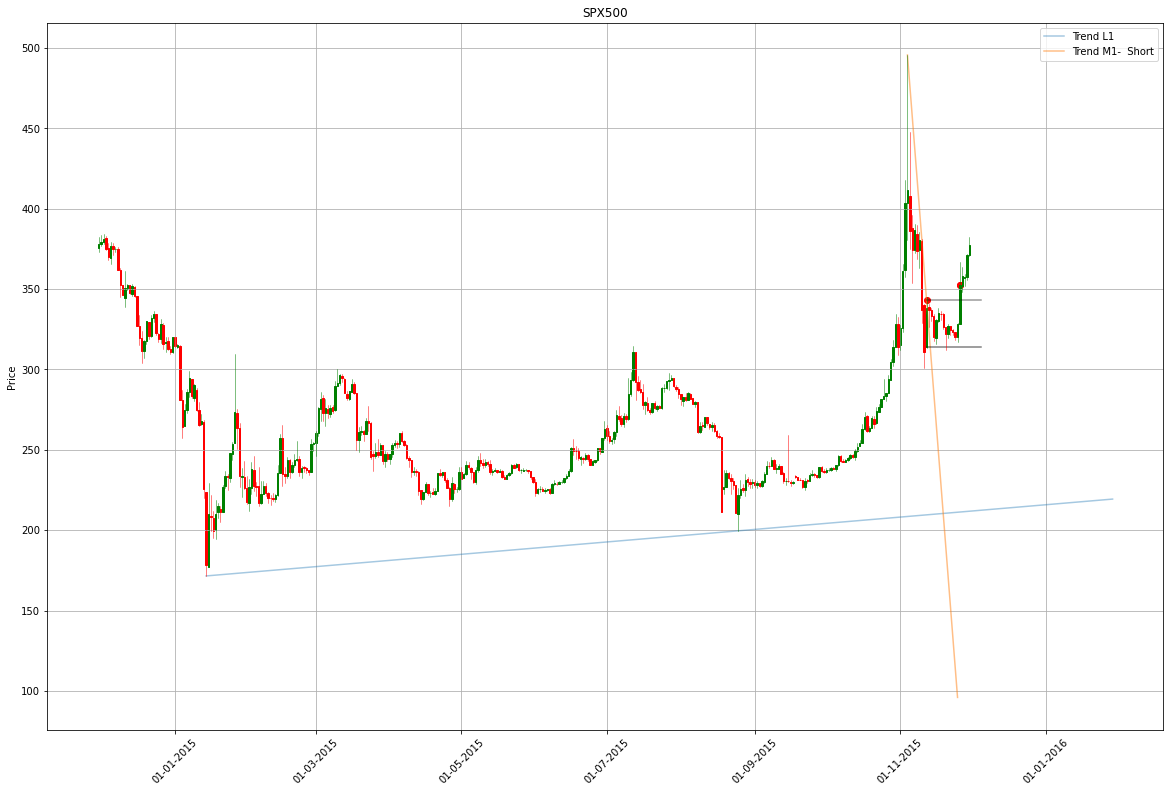

In [37]:
dfxx.reset_index(inplace = True)
dfM1.reset_index(inplace = True)
dfM1a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX, UplineY, color='black', alpha = 0.4)
ax3.plot(DownLineX, DownLineY, color='black', alpha = 0.5)

ax4.scatter(BP1[0], BP1[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP2[0], BP2[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP3[0], BP3[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

# Kolejne przebicie trendu M1

In [26]:
#Zwiększamy zakres danych nie zmieniając strategii
End = '2016-07-15'

In [27]:
End = pd.to_datetime(End)
dfxxx = df.loc[Start:End]
dfxxx.index = dfxxx.index.map(mdates.date2num)

In [28]:
#Sprawdzamy czy nastąpiło przerwanie nr. 1.
#Jeśli BP21 istnieje to przerwanie nr. 1 wystąpiło na pewno

try:
    BP2
except NameError:

    print("First break of trend did not occur")

else:
    
    print("First break of trend occured. We can check if trend goes down and breaks trendline going up again")
    
    #Sprawdzamy, czy trend został przebity w dół
    dfM11 = dfxxx[BP2[0]:]
    dfM11['TrendLine'] = dfM11.index * a2 + b2
    dfM11['DownBreakOfTL'] = dfM11['TrendLine'] - dfM11['Close']
    
    #Jeśli TL zostało przecięte przez cene w dół:
    if len(dfM11[dfM11['DownBreakOfTL']>0]) > 0:
        
        BPDownPosition = dfM11.index[dfM11['DownBreakOfTL']>0][0]
        BPDownPrice = dfM11['Close'][dfM11['DownBreakOfTL'] > 0].iloc[0]

        print('----------------------------------------------')
        print('Nastąpiło przerwanie trendu dfM11 w górę')
        print(f'Pozycja przerwania: {BPDownPosition}')
        print(f'Cena przecięcia: {BPDownPrice}')
        print('---------------------------------------------')
        
        dfM11 = dfM11[BPDownPosition:]
        
        dfM11['Distance(Close-TL)'] = dfM11['TrendLine'] - dfM11['Close']
        dfM11['Distance(Open-TL)'] = dfM11['TrendLine'] - dfM11['Open']
        dfM11['Distance(High-TL)'] = round(dfM11['TrendLine'],1) - round(dfM11['High'],1)

        QPointsAfterBrake = len(dfM11['Distance(Close-TL)'][dfM11['Distance(Close-TL)']<0])

        if QPointsAfterBrake > 0:

            print('Szukamy tunelu')



            #Sprawdzamy czy trend został przerwany całą świecą (Open-Close)
            BPPositionToCheck = dfM11.index[dfM11['Distance(Close-TL)']<0][0]
            BPOpenTL = dfM11['Distance(Open-TL)'].loc[BPPositionToCheck]

            #Jeśli cała świeca przerwała TL(M1)
            if BPOpenTL > 0:

                print('BPPosision founded is correct.')

                #Sprawdzamy, czy wielkość tunelu jest większa niż 25% wielkości świeczki
                BPPosition = BPPositionToCheck
                BPPrice = BPPosition * a2 + b2
                OpenBPPrice = dfM11['Open'].loc[BPPosition]
                CloseBPPrice = dfM11['Close'].loc[BPPosition]
                BPCandleHeight = OpenBPPrice - CloseBPPrice
                TunelHeight = BPPrice - CloseBPPrice

                #Sprawdzamy, czy przecięcie wydarzyło się w ostatnich 80 dniach
                EndingPoint = dfM11.index[-1]

                if EndingPoint - 80 > BPPosition:
                    print('Pierwszy znaleziony Breaking Point dalej niż 80 dni od końcowej daty analizowanego okresu')
                    print('-----------------------------------------------------------------------------------------')
                    print('Nie rysujemy tuneli')

                else:
                    print('Znaleziono przerwnie nie później niż 80 dni od końcowej daty analizowanego okresu')
                    print('---------------------------------------------------------------------------------')

                    #Jeżeli tunel jest mniejszy niż 25% wielkości świeczki downline = Open BP, upline = Close BP
                    if TunelHeight/BPCandleHeight < 1/4:

                        #Współrzędne tuneli
                        BPPositionEnd = dfM11.index[-1] + 5

                        UpLineX11 = [BPPosition, BPPositionEnd]
                        UpLineY11 = [CloseBPPrice, CloseBPPrice]
                        DownLineX11 = [BPPosition, BPPositionEnd]
                        DownLineY11 = [OpenBPPrice, OpenBPPrice]

                        print('Przebicie trendu spadkowego M1 w górę')
                        print(f'Poziom wsparcia: {OpenBPPrice}')
                        print(f'Poziom oporu: {CloseBPPrice}')
                        print('---------------------------------------')

                        #Szukamy przecięć tuelu
                        dfM11a = dfxxx[BPPosition:]
                        dfM11a['DownLine'] = OpenBPPrice
                        dfM11a['UpLine'] = CloseBPPrice
                        dfM11a['Down-Close'] = dfM11a['Close'] - dfM11a['DownLine']
                        dfM11a['UP-Close'] = dfM11a['UpLine'] - dfM11a['Close']

                        #Liczymy przecięcia tuneli tuneli
                        DownBreaks = len(dfM11a['Close'][dfM11a['Down-Close'] < 0])
                        UpBreaks = len(dfM11a['Close'][dfM11a['UP-Close'] < 0])

                        #Jeżeli tylko przebicie w dół
                        if DownBreaks > 0 and UpBreaks == 0:

                            BP21Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP21Position = dfM11a.index[dfM11a['Down-Close']<0][0]
                            BP11 = [BPPosition, OpenBPPrice]
                            BP21 = [BP21Position, BP21Price]
                            BP31 = BP21

                            print('Second BP founded')
                            print(f'BP21Price: {BP21Price}, BP21Position: {BP21Position}')


                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - OpenBPPrice
                            HeightOfBreak = OpenBPPrice - BP21Price

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('BP21 breaks Tunel by more than 50% height of tunel')
                                print('Short position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP31Position + 1] < BP21Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is lower than BP close price and BP21 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')



                            else:
                                print('No decisice BP yet')

                        #----------------------------------------------------------------

                        #Jeśeli tylko przebicie w górę
                        elif UpBreaks >0 and DownBreaks ==0:

                            BP31Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP31Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]
                            BP11 = [BPPosition, OpenBPPrice]
                            BP31 = [BP31Position, BP31Price]
                            BP21 = BP31

                            print('Second BP founded')
                            print(f'BP21Price: {BP31Price}, BP21Position: {BP31Position}')

                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - OpenBPPrice
                            HeightOfBreak = BP31Price - CloseBPPrice

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('------------------------------------------------')
                                print('BP21 breaks Tunel by more than 50% height of tunel')
                                print('Long position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP31Position + 1] > BP31Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is higher than BP close price and BP21 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')

                            else:
                                print('No decisice BP yet')

                        #------------------------------------------------------------------
                        #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

                        elif DownBreaks > 0 and UpBreaks > 0:

                            BP11 = [BPPosition, OpenBPPrice]

                            BP21Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP21Position = dfM11a.index[dfM11a['Down-Close']<0][0]

                            BP31Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP31Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]

                            #Jeśli BP21 (przebicie w dół) wystąpiło przed BP31 (przebicie w górę)
                            if BP21Position < BP31Position:

                                BP21 = [BP21Position, ClosingPrice_BP]
                                BP31 = [BP31Position, BPPrice]

                                print('Long Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP21}')
                                print(f'Third and decisive Break Point: {BP31}')

                            #Jeśli BP31 (przebicie w górę) wystąpiło przed BP21 (przebicie w dół)
                            elif BP21Position > BP31Position:


                                BP21 = [BP21Position, ClosingPrice_BP]
                                BP31 = [BP31Position, BPPrice]

                                print('Short Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP31}')
                                print(f'Third and decisive Break Point: {BP21}')

                    #----------------------------------------------------------------------
                        #Jeżeli nie było żadnego przebicia
                        else:

                            BP11 = [BPPosition, OpenBPPrice]
                            BP21 = BP11
                            BP31 = BP11

                            print('No break point founded. You should wait')



                #------------------------------------------------------------------------------------------------------
                    #Jeżeli tunel jest większy niż 25% wielkości świeczki downline = BP, upline = Close BP
                    else:

                        #Współrzędne tuneli
                        BPPositionEnd = dfM11.index[-1] + 5

                        UpLineX11 = [BPPosition, BPPositionEnd]
                        UpLineY11 = [CloseBPPrice, CloseBPPrice]
                        DownLineX11 = [BPPosition, BPPositionEnd]
                        DownLineY11 = [BPPrice, BPPrice]

                        print('Przebicie trendu spadkowego M1 w górę')
                        print(f'Poziom wsparcia: {BPPrice}')
                        print(f'Poziom oporu: {CloseBPPrice}')
                        print('---------------------------------------')

                        #Szukamy przecięć tuelu
                        dfM11a = dfxxx[BPPosition:]
                        dfM11a['DownLine'] = BPPrice
                        dfM11a['UpLine'] = CloseBPPrice
                        dfM11a['Down-Close'] = dfM11a['Close'] - dfM11a['DownLine']
                        dfM11a['UP-Close'] = dfM11a['UpLine'] - dfM11a['Close']

                        #Liczymy przecięcia tuneli tuneli
                        DownBreaks = len(dfM11a['Close'][dfM11a['Down-Close'] < 0])
                        UpBreaks = len(dfM11a['Close'][dfM11a['UP-Close'] < 0])

                        #Jeżeli tylko przebicie w dół
                        if DownBreaks > 0 and UpBreaks == 0:

                            BP21Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP21Position = dfM11a.index[dfM11a['Down-Close']<0][0]
                            BP11 = [BPPosition, BPPrice]
                            BP21 = [BP21Position, BP21Price]
                            BP31 = BP21

                            print('Second BP founded')
                            print(f'BP21Price: {BP21Price}, BP21Position: {BP21Position}')


                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - BPPrice
                            HeightOfBreak = BPPrice - BP21Price

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('BP21 breaks Tunel by more than 50% height of tunel')
                                print('Short position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się poniżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP31Position + 1] < BP21Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is lower than BP close price and BP21 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')



                            else:
                                print('No decisice BP yet')

                        #----------------------------------------------------------------

                        #Jeśeli tylko przebicie w górę
                        elif UpBreaks >0 and DownBreaks ==0:

                            BP31Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP31Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]
                            BP11 = [BPPosition, BPPrice]
                            BP31 = [BP31Position, BP31Price]
                            BP21 = BP31

                            print('Second BP founded')
                            print(f'BP21Price: {BP31Price}, BP21Position: {BP31Position}')

                            #Sprawdzamy, czy przebicie było większe niż 50% wielkości tunelu
                            HeightOfTunel = CloseBPPrice - BPPrice
                            HeightOfBreak = BP31Price - CloseBPPrice

                            if HeightOfBreak >= 0.5 * HeightOfTunel:

                                print('------------------------------------------------')
                                print('BP21 breaks Tunel by more than 50% height of tunel')
                                print('Long position recomended')

                            #Sprawdzamy, czy 2 świeczka zamyka się powyżej poprzedniej ceny zamknięcia:

                            elif dfM11['Close'].loc[BP31Position + 1] > BP31Price and HeightOfBreak >= 0.3 * HeightOfTunel and HeightOfBreak < 0.5 * HeightOfTunel:

                                print('---------------------------------------------------------------------')
                                print('Close price after BP is higher than BP close price and BP21 breaks Tunel by more than 30% height of tunel')

                                print('Long position recomended')

                            else:
                                print('No decisice BP yet')

                        #------------------------------------------------------------------
                        #Jeśli cena przebiła tunel w górę i w dół conajmniej po 1 raz

                        elif DownBreaks > 0 and UpBreaks > 0:

                            BP11 = [BPPosition, BPPrice]

                            BP21Price = dfM11a['Close'][dfM11a['Down-Close'] < 0].iloc[0]
                            BP21Position = dfM11a.index[dfM11a['Down-Close']<0][0]

                            BP31Price = dfM11a['Close'][dfM11a['UP-Close'] < 0].iloc[0]
                            BP31Position = dfM11a.index[dfM11a['UP-Close'] < 0][0]

                            #Jeśli BP21 (przebicie w dół) wystąpiło przed BP31 (przebicie w górę)
                            if BP21Position < BP31Position:

                                BP21 = [BP21Position, ClosingPrice_BP]
                                BP31 = [BP31Position, BPPrice]

                                print('Long Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP21}')
                                print(f'Third and decisive Break Point: {BP31}')

                            #Jeśli BP31 (przebicie w górę) wystąpiło przed BP21 (przebicie w dół)
                            elif BP21Position > BP31Position:


                                BP21 = [BP21Position, ClosingPrice_BP]
                                BP31 = [BP31Position, BPPrice]

                                print('Short Position recomended')
                                print(f'First Break Point: {BP11}')
                                print(f'Second Break Point: {BP31}')
                                print(f'Third and decisive Break Point: {BP21}')

                        #----------------------------------------------------------------------
                        #Jeżeli nie było żadnego przebicia
                        else:

                            BP11 = [BPPosition, BPPrice]
                            BP21 = BP11
                            BP31 = BP11

                            print('No break point founded. You should wait')


        #--------------------------------------------------------------------------------------------------------------            
            #Jeśli cała świeca znalazła się nad TL(M1), a przerwanie nastąpiło przez przerwanie High-Close        
            else:
                print('no')


    else:
        print('fuck that')


First break of trend occured. We can check if trend goes down and breaks trendline going up again
----------------------------------------------
Nastąpiło przerwanie trendu dfM11 w górę
Pozycja przerwania: 16765.0
Cena przecięcia: 352.68399
---------------------------------------------


In [29]:
dfxxx.reset_index(inplace = True)
dfM11.reset_index(inplace = True)
dfM11a.reset_index(inplace = True)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)


ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax2.plot(X_long, Y_long, label='Trend L1', alpha = 0.4)
ax2.plot(X_mid1, Y_mid1, label='Trend M1-  Short', alpha = 0.5)

ax3.plot(UpLineX11, UpLineY11, color='black', alpha = 0.4)
ax3.plot(DownLineX11, DownLineY11, color='black', alpha = 0.5)

ax4.scatter(BP11[0], BP11[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP21[0], BP21[1], alpha=1, color = 'red', edgecolors = 'face' )
ax4.scatter(BP31[0], BP31[1], alpha=1, color = 'red', edgecolors = 'face' )

plt.ylabel("Price")
plt.title('SPX500')
ax1.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
candlestick_ohlc(ax1, dfxxx.values, width=0.6, colorup='g', colordown='r')
plt.show()

NameError: name 'dfM11a' is not defined